**Simple Linear Regression on Housing Price**:

In [14]:
from google.colab import files
uploaded = files.upload()


Saving HousePricePrediction.xlsx - Sheet1.csv to HousePricePrediction.xlsx - Sheet1 (1).csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
df = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')



In [19]:
df.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [20]:
df.isnull().sum()
df = df.dropna()  # Dropping missing values for simplicity


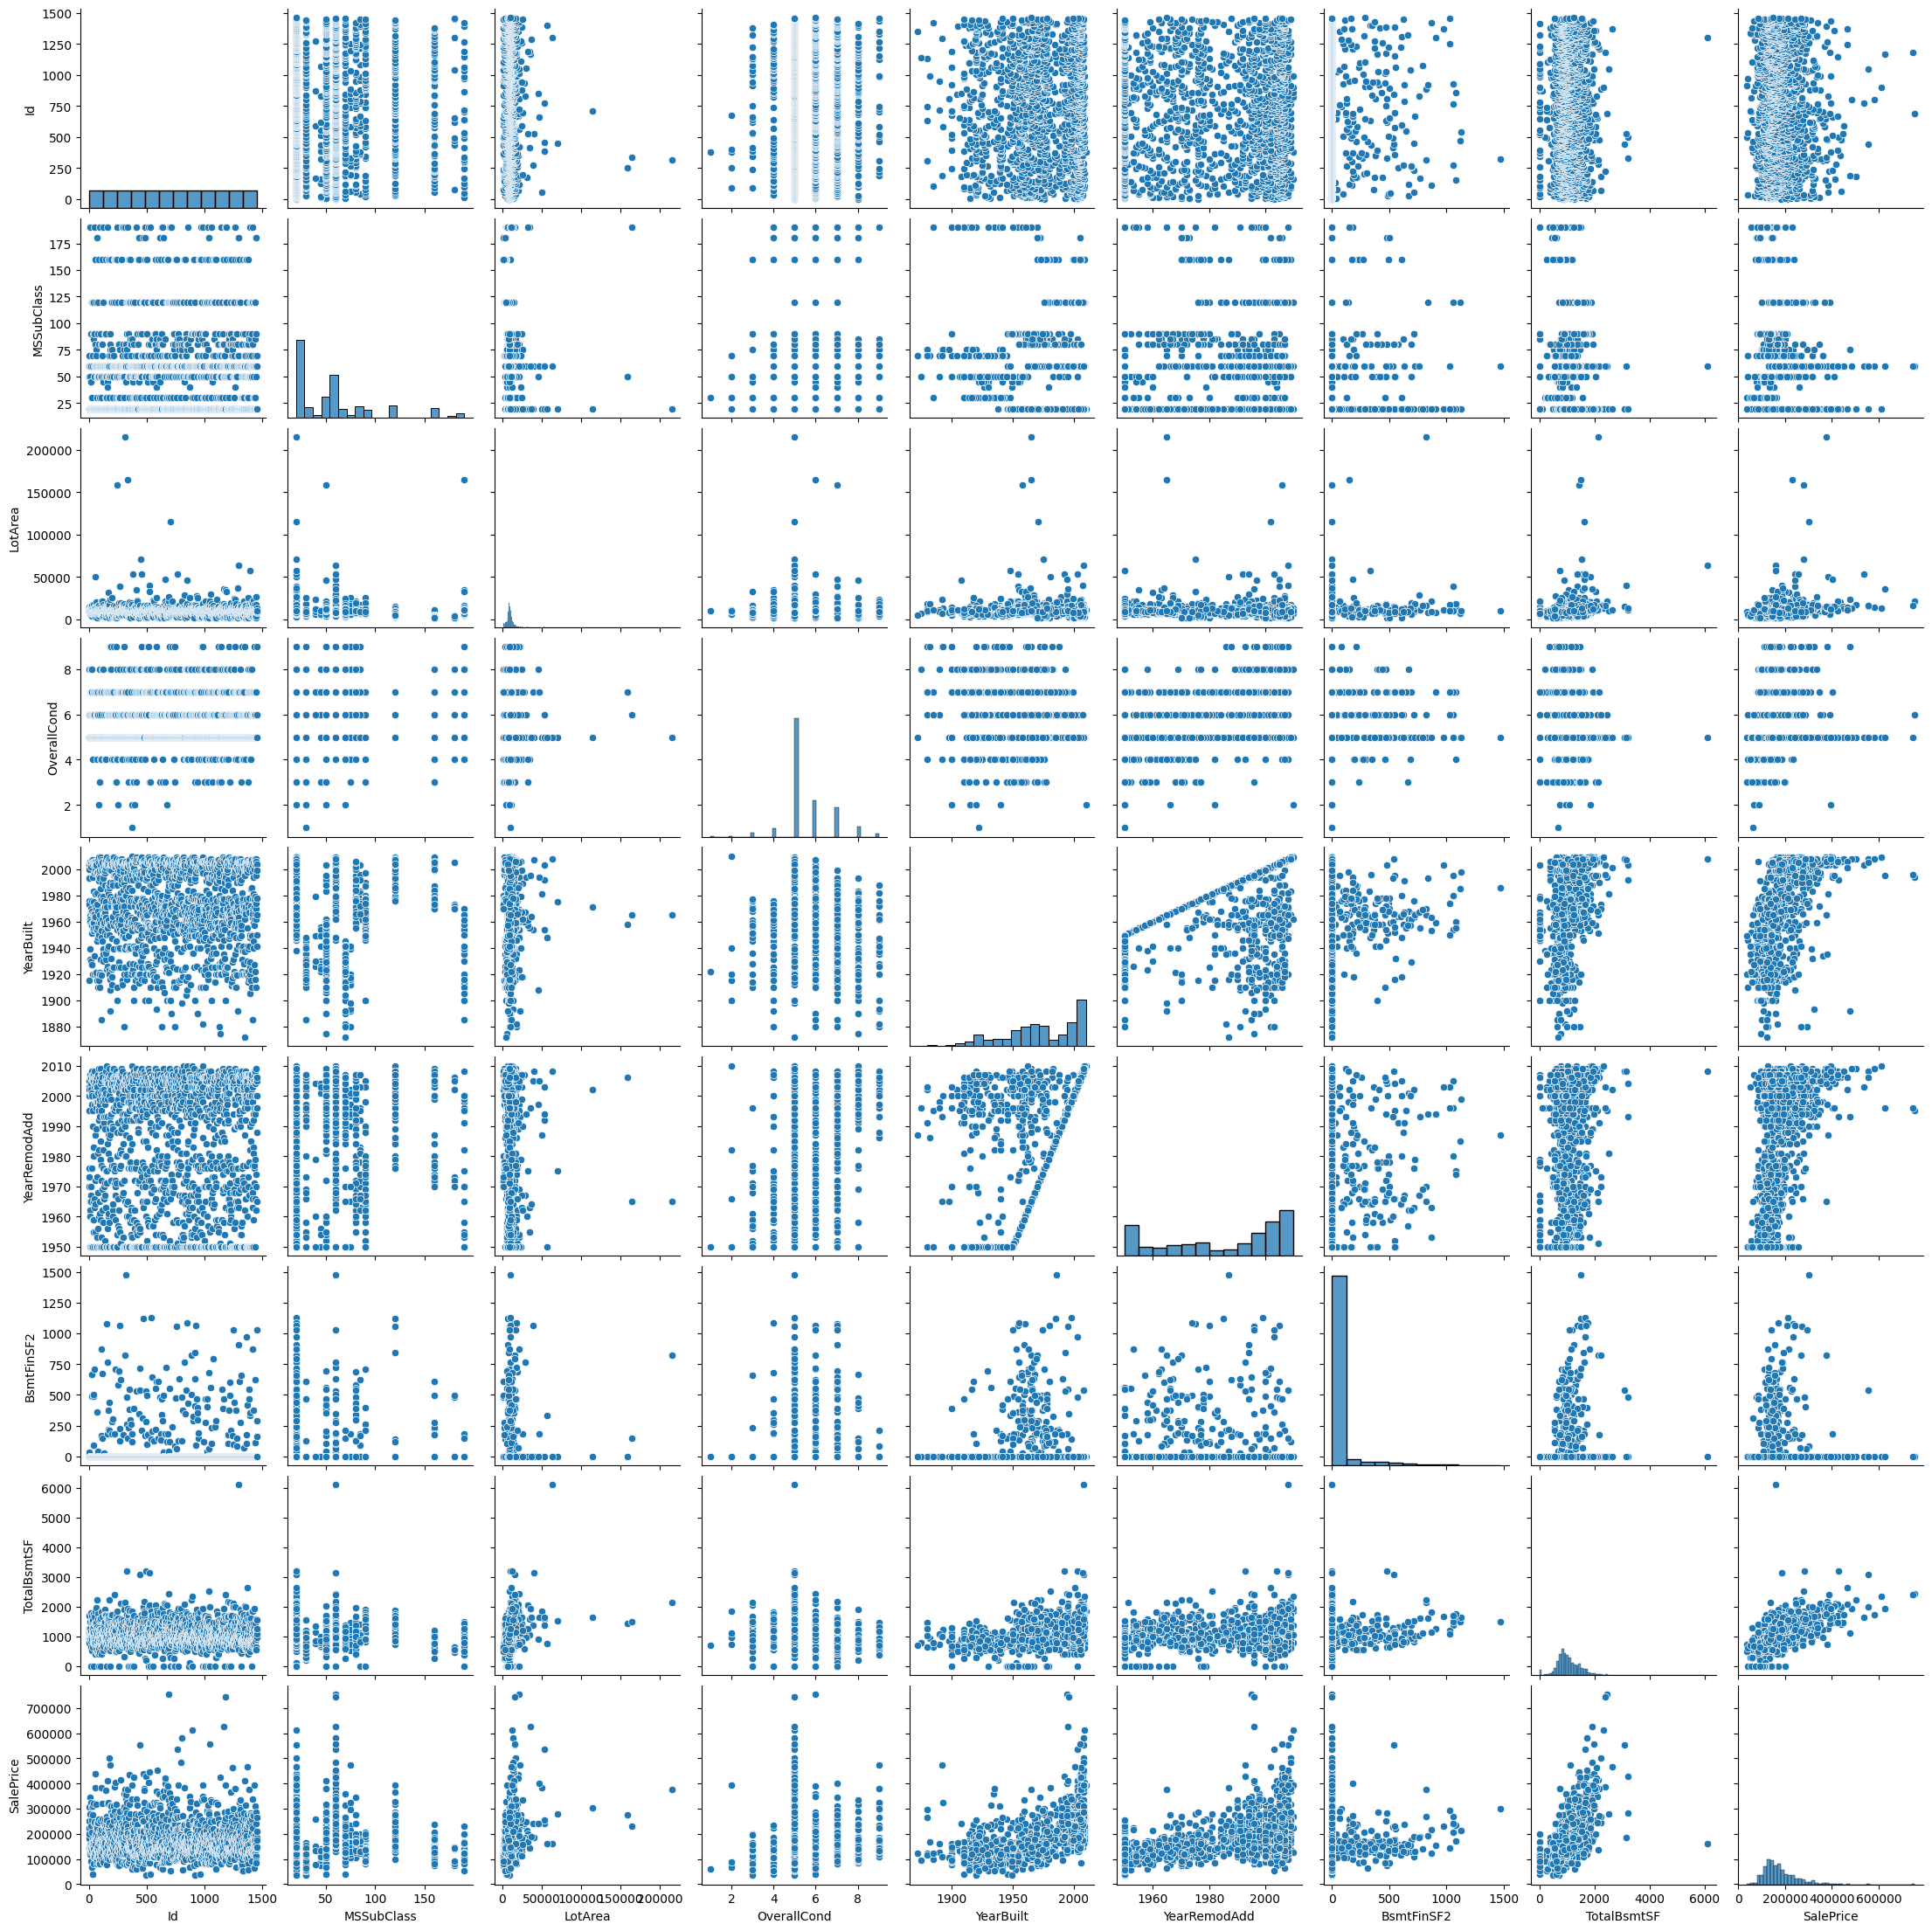

In [21]:
sns.pairplot(df)
plt.show()


In [24]:
# Selecting features
X = df[['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']]  # Features
y = df['SalePrice']  # Target variable


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
y_pred = model.predict(X_test)


In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error: 3423662196.408934
R-Squared: 0.5536484232963979


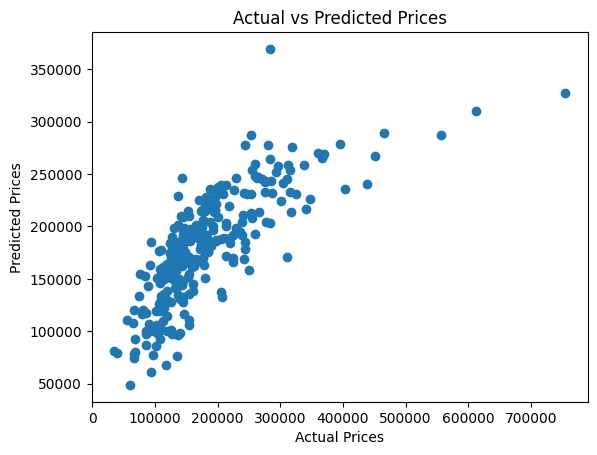

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [31]:
import joblib
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - R-Squared: {rf_r2}')


Random Forest - Mean Squared Error: 1176058543.4198132
Random Forest - R-Squared: 0.8466742467461368


In [33]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f'XGBoost - Mean Squared Error: {xgb_mse}')
print(f'XGBoost - R-Squared: {xgb_r2}')


XGBoost - Mean Squared Error: 1753443237.9686973
XGBoost - R-Squared: 0.771399130805452


In [34]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

best_rf_mse = mean_squared_error(y_test, best_rf_pred)
best_rf_r2 = r2_score(y_test, best_rf_pred)

print(f'Best Random Forest - Mean Squared Error: {best_rf_mse}')
print(f'Best Random Forest - R-Squared: {best_rf_r2}')


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest - Mean Squared Error: 1228635580.657362
Best Random Forest - R-Squared: 0.8398196442406679


In [35]:

df['HouseAge'] = df['YearBuilt'].apply(lambda x: 2024 - x)

df['LotArea*OverallCond'] = df['LotArea'] * df['OverallCond']


In [36]:
df = pd.get_dummies(df, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], drop_first=True)


In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [38]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

stacking_mse = mean_squared_error(y_test, stacking_pred)
stacking_r2 = r2_score(y_test, stacking_pred)

print(f'Stacking - Mean Squared Error: {stacking_mse}')
print(f'Stacking - R-Squared: {stacking_r2}')


Stacking - Mean Squared Error: 1313919513.6706772
Stacking - R-Squared: 0.8287009602747365


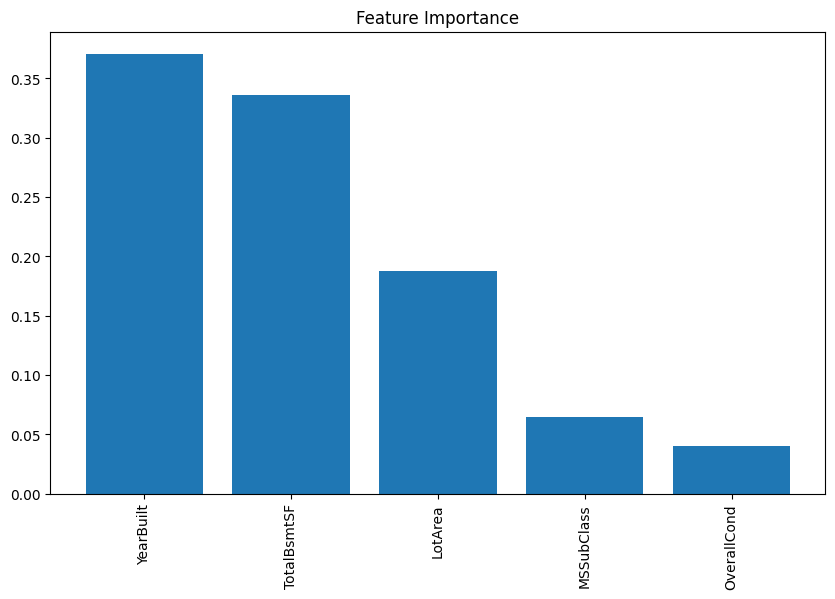

In [39]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()


In [40]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores: {-cv_scores}')
print(f'Average MSE: {-cv_scores.mean()}')


Cross-Validation Scores: [1.22767402e+09 1.78952308e+09 1.49031183e+09 1.10659683e+09
 1.87908850e+09]
Average MSE: 1498638852.5342422


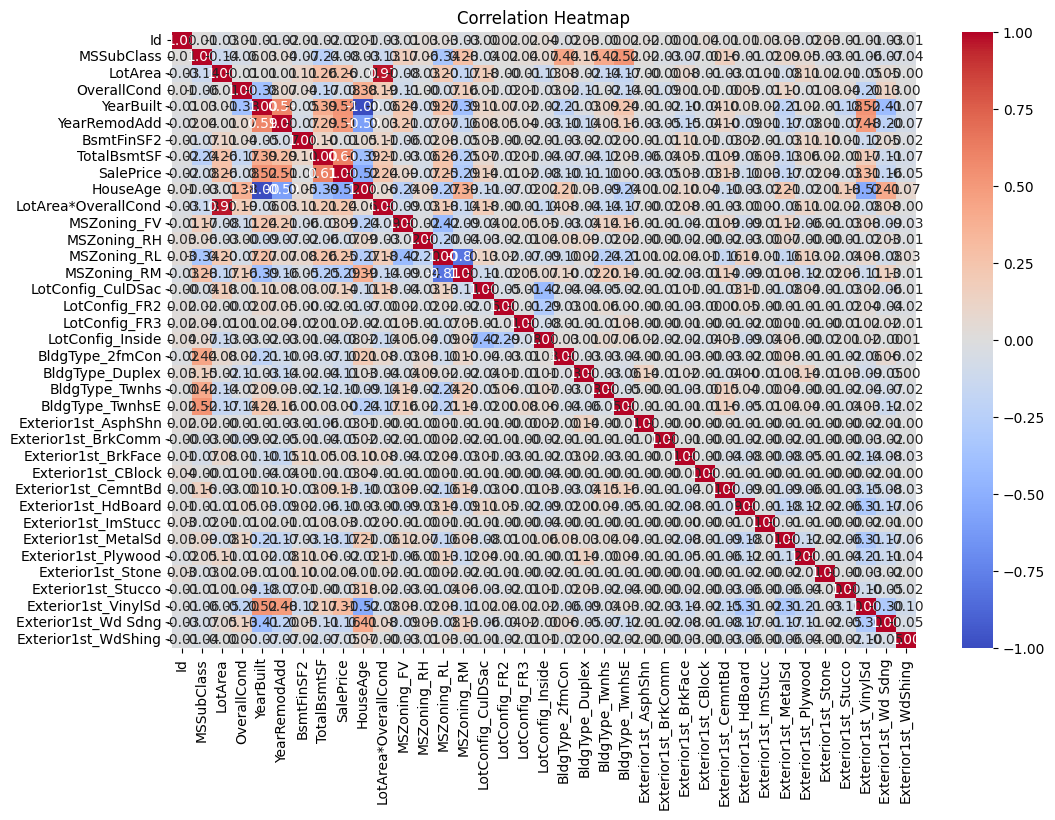

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


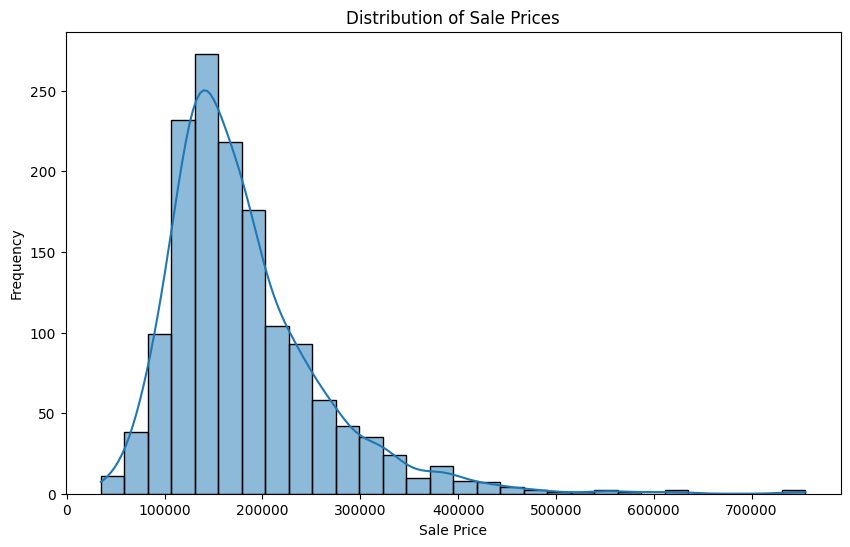

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


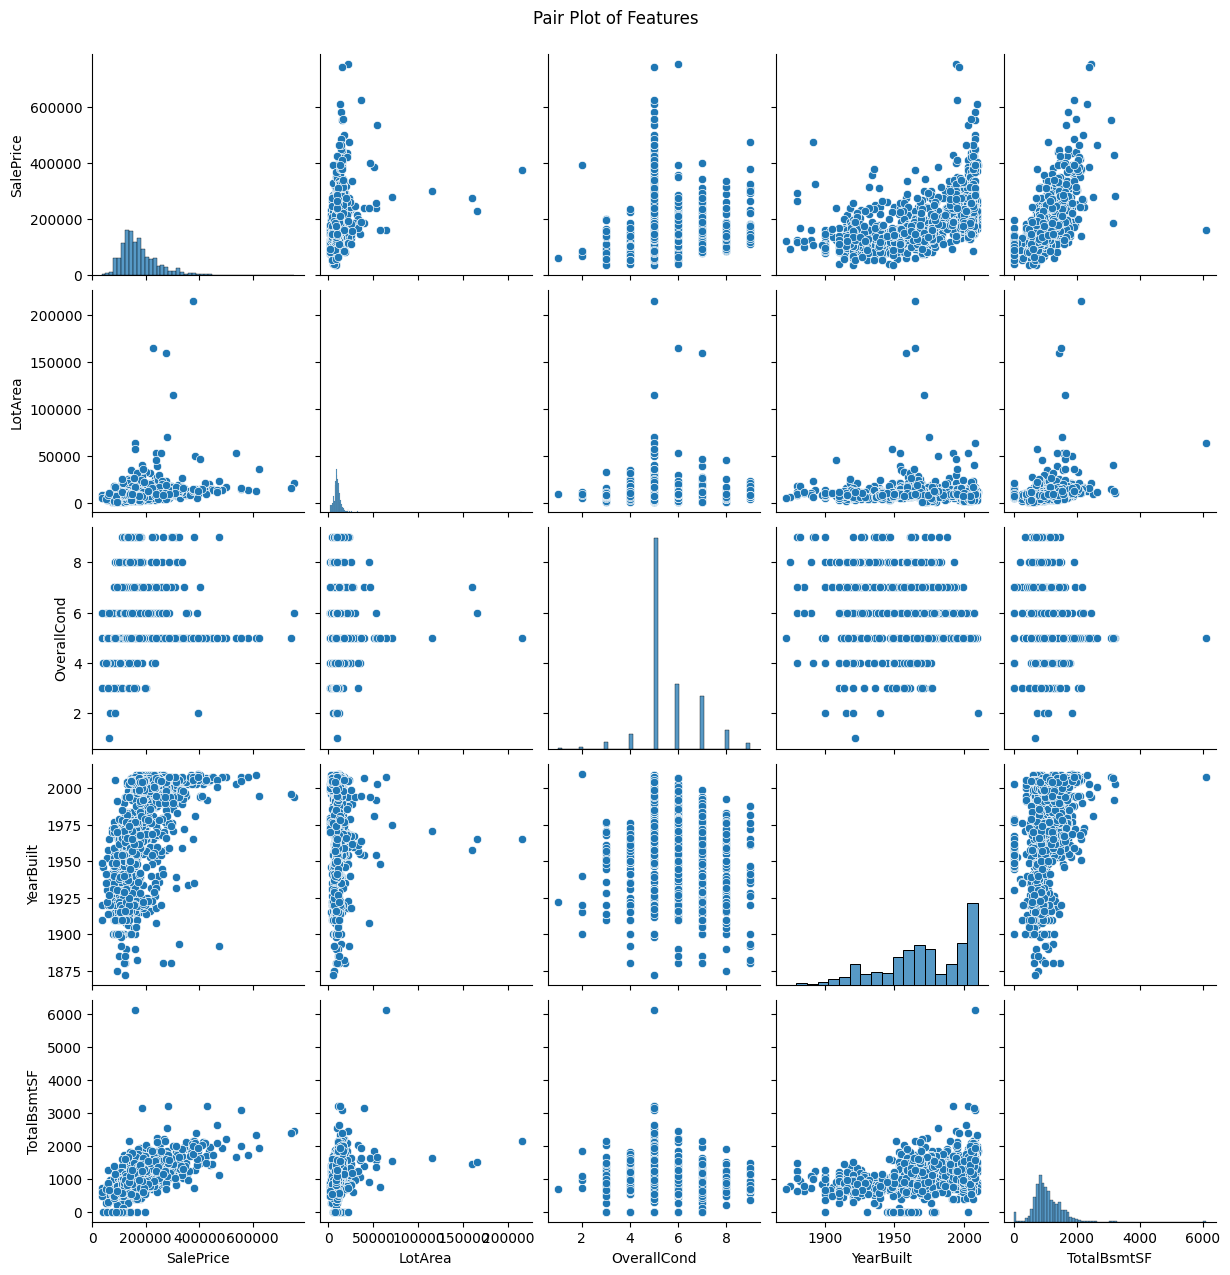

In [43]:
sns.pairplot(df[['SalePrice', 'LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


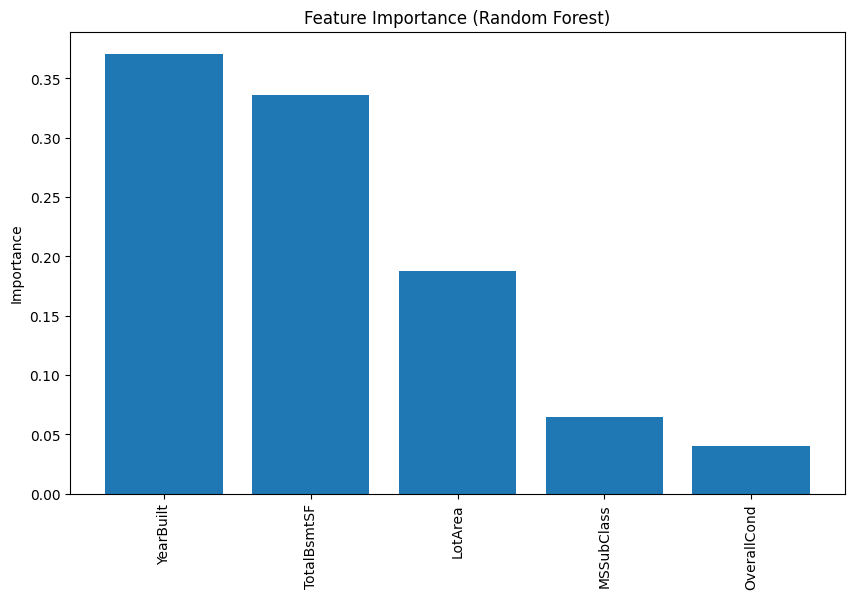

In [44]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.ylabel('Importance')
plt.show()


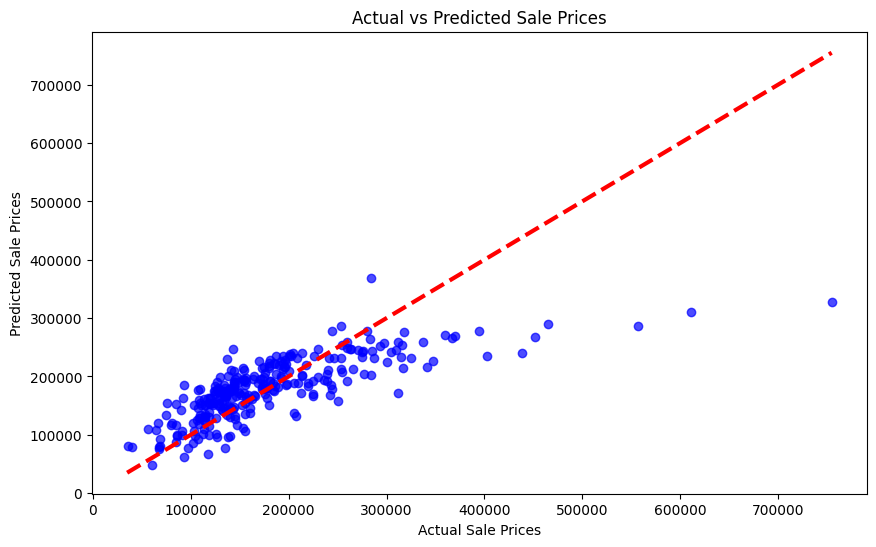

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()


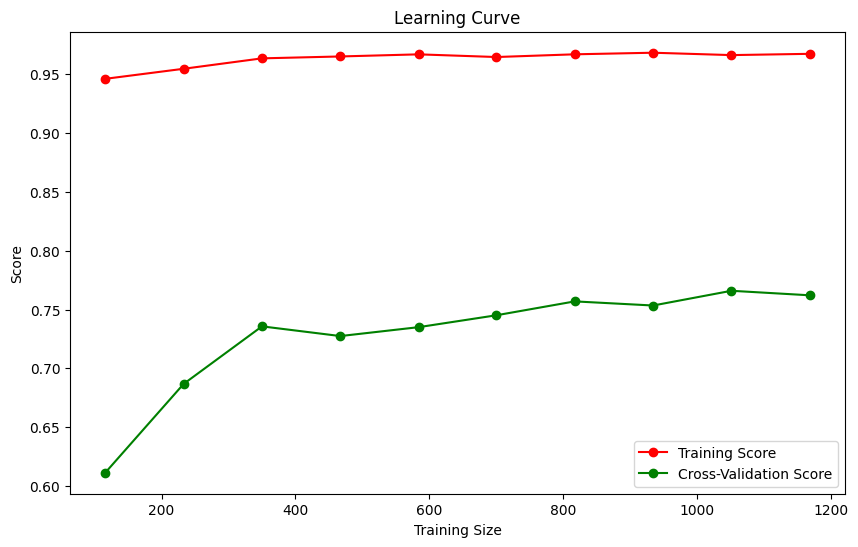

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(random_state=42), X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

